In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Problem 1

Prove that $z \sim \mathcal{N}\left( \mu, \sigma \right) \Leftrightarrow z = \mu+ \epsilon\sigma, \epsilon \sim \mathcal{N}\left(0,1 \right)$

Proof:

In [2]:
mu, var = 10, 4       
sigma = np.sqrt(var) 

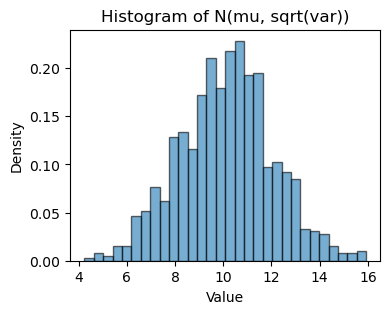

In [9]:
# LHS

LHS = np.random.normal(mu, sigma, 1000)

fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(LHS, bins=30, density=True, alpha=0.6, edgecolor='black')
ax.set_title("Histogram of N(mu, sqrt(var))")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()      

plt.close(fig)

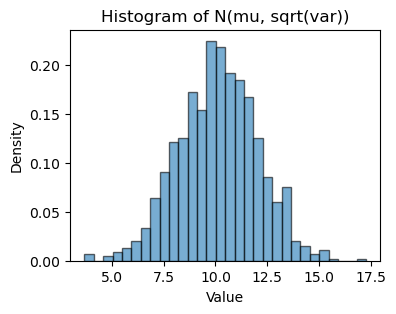

In [10]:
# RHS

RHS = mu + np.random.normal(0, 1, 1000) * sigma

fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(RHS, bins=30, density=True, alpha=0.6, edgecolor='black')
ax.set_title("Histogram of N(mu, sqrt(var))")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()      

plt.close(fig)

In [12]:
ks_stat, p_value = stats.ks_2samp(LHS, RHS)

print(f"KS statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ Fail to reject H0 → The two samples are likely from the same distribution.")
else:
    print("❌ Reject H0 → The two samples are likely from different distributions.")

KS statistic: 0.0240
P-value: 0.9358
✅ Fail to reject H0 → The two samples are likely from the same distribution.


# Problem 2

## 2.1

Given $x_0 , \, \epsilon \sim \mathcal{N}(0, 1), \, \alpha_1 \in (0,1)$ and  $x_1 = \sqrt{\alpha_1}\, x_0 + \sqrt{1-\alpha_1}\, \epsilon$

Prove that: $x_1 \sim \mathcal{N}\Big(\sqrt{\alpha_1}\, x_0, \, (1-\alpha_1) \Big)$

### Theoretical proof

$\mathbb{E}[x_1 \mid x_0]
= \mathbb{E}\big[\sqrt{\alpha_1}\,x_0 + \sqrt{1-\alpha_1}\,\epsilon \,\big|\, x_0\big]
= \sqrt{\alpha_1}\,x_0 + \sqrt{1-\alpha_1}\,\mathbb{E}[\epsilon]
= \sqrt{\alpha_1}\,x_0.$

$\mathrm{Var}(x_1 \mid x_0)
= \mathrm{Var}\big(\sqrt{\alpha_1}\,x_0 + \sqrt{1-\alpha_1}\,\epsilon \,\big|\, x_0\big)
= \mathrm{Var}\big(\sqrt{1-\alpha_1}\,\epsilon\big)
= (1-\alpha_1)\,\mathrm{Var}(\epsilon)
= (1-\alpha_1)$

### Experimental proof 

Shape of y:  (1000,)


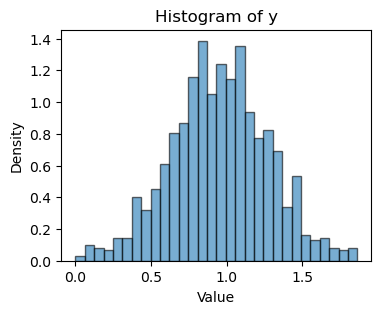

In [9]:
x = 1
alpha = 0.9
epsilon = np.random.randn(1000)

y = np.sqrt(alpha)*x + np.sqrt(1-alpha)*epsilon
print("Shape of y: ", y.shape)

fig, ax = plt.subplots(figsize=(4, 3))

ax.hist(y, bins=30, density=True, alpha=0.6, edgecolor='black')
ax.set_title("Histogram of y")
ax.set_xlabel("Value")
ax.set_ylabel("Density")

plt.show()    

In [13]:
ks_stat, p_value = stats.kstest(y, 'norm', args=(np.sqrt(alpha)*x, np.sqrt(1 - alpha)))
print(f"KS statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ Fail to reject H0 → The two samples are likely from the same distribution.")
else:
    print("❌ Reject H0 → The two samples are likely from different distributions.")

KS statistic: 0.0164
P-value: 0.9463
✅ Fail to reject H0 → The two samples are likely from the same distribution.


# 2.2

Given $x_{t+1} = \sqrt[]{1 - \beta_{t+1}} x_{t} + \sqrt[]{\beta_{t+1}} \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0,1)$

Prove that $x_t \sim \mathcal{N}\left( \sqrt{\overline{\alpha}_t}x_0, 1 - \overline{\alpha}_t \right), \text{where } \overline{\alpha}_t = \prod_{i=1}^{T}\left( 1 - \beta_t \right)$

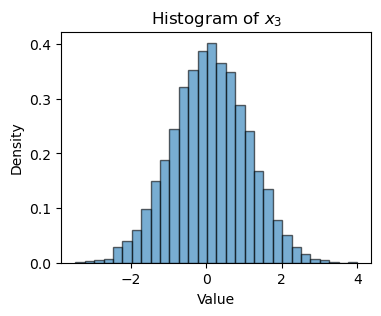

In [14]:
x_0 = 1
beta_1, beta_2, beta_3 = 0.9, 0.75, 0.6
epsilon_0 = np.random.randn(10000)
epsilon_1 = np.random.randn(10000)
epsilon_2 = np.random.randn(10000)

x_1 = np.sqrt(1 - beta_1)*x_0 + np.sqrt(beta_1)*epsilon_0
x_2 = np.sqrt(1 - beta_2)*x_1 + np.sqrt(beta_2)*epsilon_1
x_3 = np.sqrt(1 - beta_3)*x_2 + np.sqrt(beta_3)*epsilon_2

fig, ax = plt.subplots(figsize=(4, 3))
ax.hist(x_3, bins=30, density=True, alpha=0.6, edgecolor='black')
ax.set_title("Histogram of $x_3$")
ax.set_xlabel("Value")
ax.set_ylabel("Density")
plt.show()
plt.close(fig)

In [21]:
alpha_3_hat = (1 - beta_1)*(1 - beta_2)*(1 - beta_3)
ks_stat, p_value = stats.kstest(x_3, 'norm', args=(np.sqrt(alpha_3_hat)*x_0, np.sqrt(1 - alpha_3_hat)))
print(f"KS statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("✅ Fail to reject H0 → The two samples are likely from the same distribution.")
else:
    print("❌ Reject H0 → The two samples are likely from different distributions.")

KS statistic: 0.0066
P-value: 0.7683
✅ Fail to reject H0 → The two samples are likely from the same distribution.
